# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | calama
Processing Record 2 of Set 1 | aswan
Processing Record 3 of Set 1 | west island
Processing Record 4 of Set 1 | quepos
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | las higueras
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | champerico
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | midvagur
Processing Record 13 of Set 1 | nizhneangarsk
Processing Record 14 of Set 1 | anadyr
Processing Record 15 of Set 1 | usogorsk
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | macapa
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | san patricio
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | luderitz
Processing R

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [14]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,calama,-22.4667,-68.9333,21.27,5,0,9.26,CL,1728687613
1,aswan,24.0934,32.9070,27.61,21,0,2.06,EG,1728687635
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1728687726
3,quepos,9.4236,-84.1652,26.15,89,100,0.86,CR,1728687728
4,invercargill,-46.4000,168.3500,13.90,61,55,4.02,NZ,1728687729


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calama,-22.4667,-68.9333,21.27,5,0,9.26,CL,1728687613
1,aswan,24.0934,32.9070,27.61,21,0,2.06,EG,1728687635
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1728687726
3,quepos,9.4236,-84.1652,26.15,89,100,0.86,CR,1728687728
4,invercargill,-46.4000,168.3500,13.90,61,55,4.02,NZ,1728687729


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

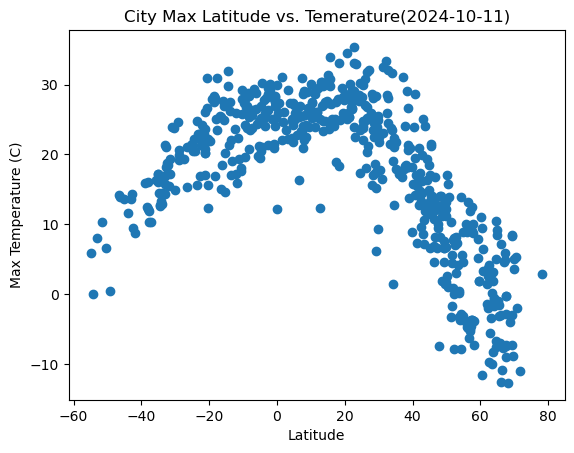

In [20]:
from datetime import datetime
#datetime.utcfromtimestamp(unix_time_value)
# Build scatter plot for latitude vs. temperature
xcoors = city_data_df['Lat']
ycoors = city_data_df['Max Temp']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temerature({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

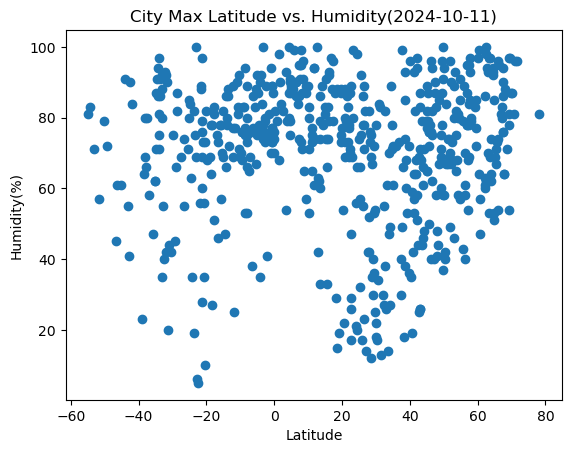

In [22]:
# Build the scatter plots for latitude vs. humidity
xcoors = city_data_df['Lat']
ycoors = city_data_df['Humidity']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f"City Max Latitude vs. Humidity({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

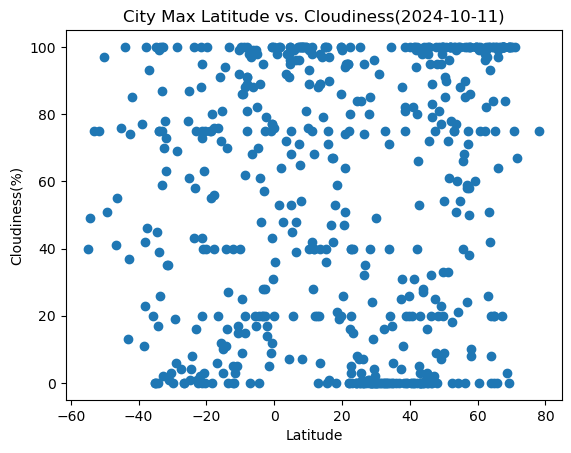

In [24]:
# Build the scatter plots for latitude vs. cloudiness
xcoors = city_data_df['Lat']
ycoors = city_data_df['Cloudiness']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f"City Max Latitude vs. Cloudiness({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

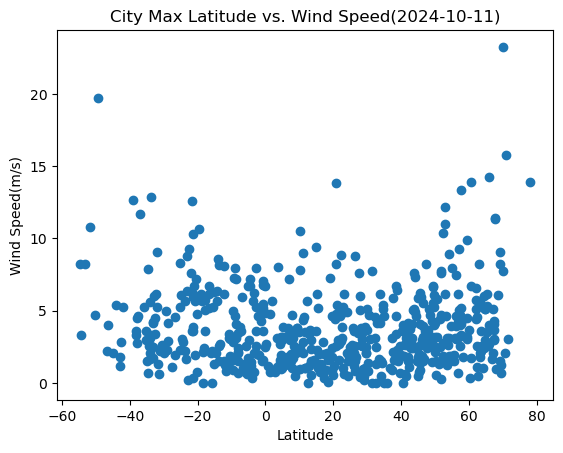

In [26]:
# Build the scatter plots for latitude vs. wind speed
xcoors = city_data_df['Lat']
ycoors = city_data_df['Wind Speed']
plt.scatter(xcoors,ycoors)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title(f"City Max Latitude vs. Wind Speed({datetime.fromtimestamp(city_data_df["Date"][0]).strftime('%Y-%m-%d')})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def LinReg(xs,ys):
    slope, intercept, rvalue, pvalue, stderr = linregress(xs,ys)
    linregs = [slope,intercept,rvalue,pvalue,stderr]
    return linregs

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aswan,24.0934,32.9070,27.61,21,0,2.06,EG,1728687635
3,quepos,9.4236,-84.1652,26.15,89,100,0.86,CR,1728687728
5,ribeira grande,38.5167,-28.7000,18.21,74,81,1.79,PT,1728687730
9,champerico,14.3000,-91.9167,27.54,78,79,1.60,GT,1728687735
11,midvagur,62.0511,-7.1939,1.46,86,75,5.14,FO,1728687738


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,calama,-22.4667,-68.9333,21.27,5,0,9.26,CL,1728687613
2,west island,-12.1568,96.8225,25.99,89,40,6.17,CC,1728687726
4,invercargill,-46.4000,168.3500,13.90,61,55,4.02,NZ,1728687729
6,las higueras,-33.0923,-64.2890,21.34,35,87,2.48,AR,1728687731
7,avarua,-21.2078,-159.7750,26.03,69,75,10.29,CK,1728687733


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7076051463689302


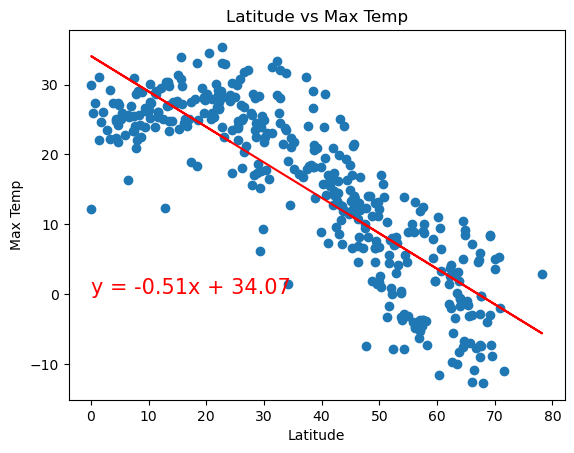

In [38]:
# Linear regression on Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Max Temp']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(xcoors,regeq,color = 'r')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.6155652863879036


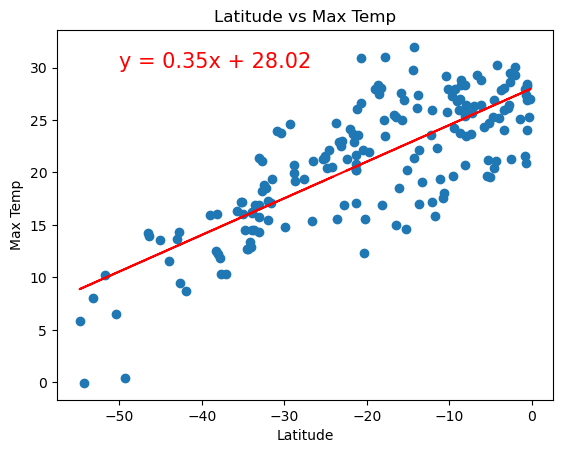

In [40]:
# Linear regression on Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Max Temp']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** These graphs are comparing the distance from the equator (Latitude) and the the temperature of the cities. In both of the graphs the regression is showing that the closer you get to equator the warmer the temperature gets. Based on the R squared values there is a high moderate to strong correlation between the temperature and the closeness to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00040067077339838515


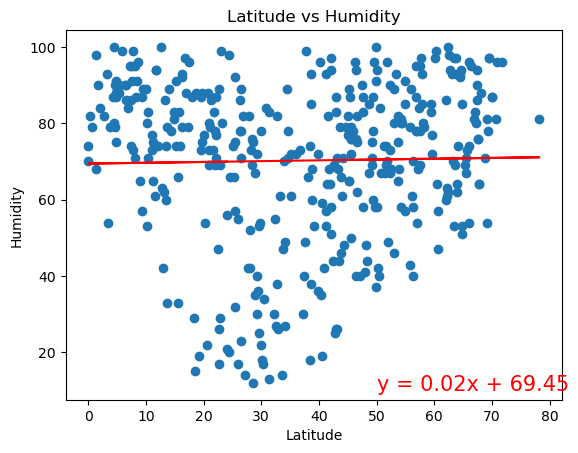

In [42]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Humidity']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.003481614822129779


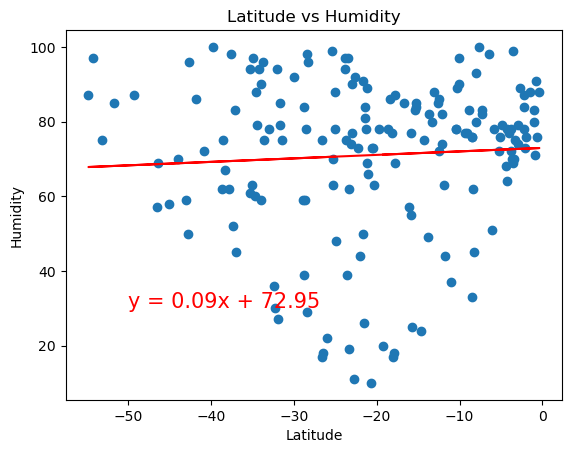

In [49]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Humidity']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** These graphs are comparing Humidity to Latitude. Looking at the graphs the points seem to be all over the place. This is confirmed by the Linear Regression having an R squared values close to 0 or no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.008569033149974689


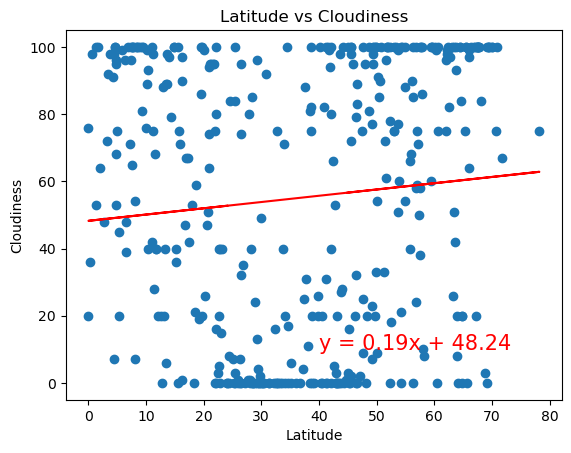

In [44]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Cloudiness']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.00014362016830564076


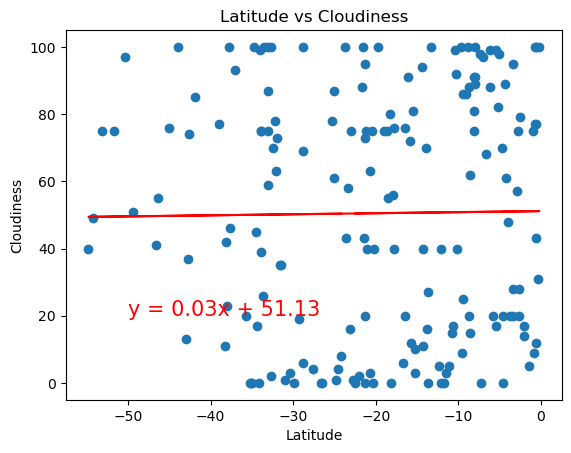

In [46]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Cloudiness']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** These graphs are comparing the cloudiness of the area and Latitude. These points also appear to be all over the place. Which is also confirmed by the R-squared values being close to zero showing no correlation between the 2 sets of data.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.06996042998119359


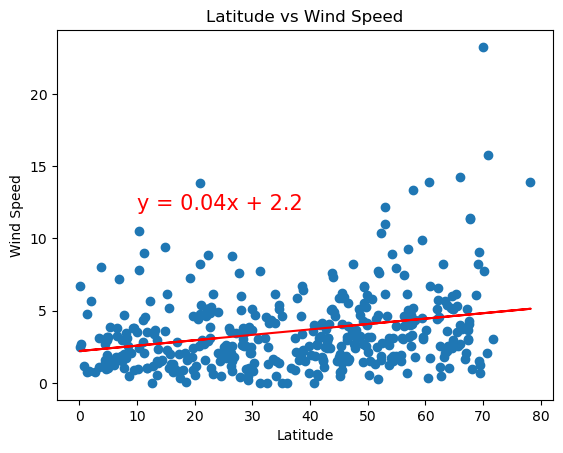

In [52]:
# Northern Hemisphere
xcoors = northern_hemi_df['Lat']
ycoors = northern_hemi_df['Wind Speed']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(10,12),fontsize=15,color="red")
plt.show()

The r^2-value is: 0.035573503301996406


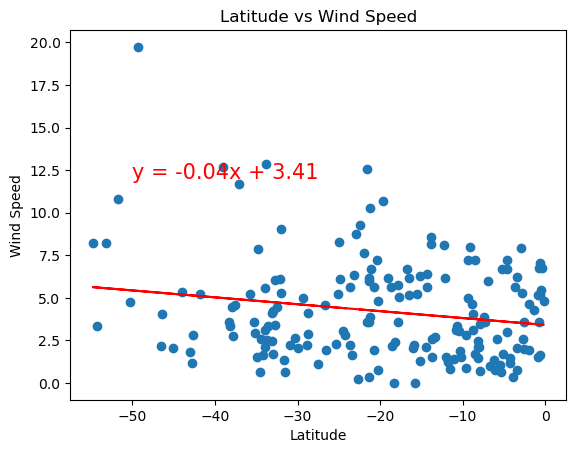

In [50]:
# Southern Hemisphere
xcoors = southern_hemi_df['Lat']
ycoors = southern_hemi_df['Wind Speed']
reginfo = LinReg(xcoors,ycoors)
regeq = reginfo[0]* xcoors + reginfo[1]
print(f"The r^2-value is: {reginfo[2]**2}")
plt.scatter(xcoors,ycoors)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.plot(xcoors,regeq,color = 'red')
line_eq = "y = " + str(round(reginfo[0],2)) + "x + " + str(round(reginfo[1],2))
plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE